Initial Idea: Predict the rest of Lebron's season based on the defensive rating of his opponents.

General Plan: Take all of Lebron's scoring this season and plot it against the defensive rating at that time of the team he played.

Defensive Rating: (Opponent Points/Possessions)*100

1. Grab NBA game-by-game data

    Filter by Lakers
    Retrieve Date and Defensive Rating for non-Lakers team
    
2. Grab Lebron's points scored for every game

    Retreive Date as well
    
3. Match up dates in a dataframe

    Dataframe should have three columns
    
        Date
        Lebron's Points Scored
        Opponent's Defensive Rating (DRTG)

4. Use DRTG as the independent variable, and points as the dependent.

In [5]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import chromedriver_binary
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Scraping

In [6]:
driver = Chrome()
driver.get('https://www.nba.com/stats/teams/boxscores-advanced/?Season=2021-22&SeasonType=Regular%20Season&OpponentTeamID=1610612747')

text = driver.find_elements(By.TAG_NAME,"td")
column_titles = driver.find_elements(By.TAG_NAME,"th")
text

alist = []
for i in text:
    alist.append(i.text)

next_page = driver.find_element(By.CLASS_NAME,'stats-table-pagination__next')
next_page.click()
next_page.click()
time.sleep(3)

text2 = driver.find_elements(By.TAG_NAME,"td")

In [7]:
blist = []

for i in text2:
    blist.append(i.text)

In [29]:
blist

['DET',
 'DET vs. LAL',
 '11/21/2021',
 '',
 'L',
 '48',
 '111.5',
 '117.5',
 '-5.9',
 '62.8',
 '2.45',
 '18.8',
 '25.9',
 '68.8',
 '46.1',
 '10.6',
 '51.5',
 '54.6',
 '103.50',
 '44.1',
 'BOS',
 'BOS vs. LAL',
 '11/19/2021',
 '',
 'W',
 '48',
 '130.0',
 '109.1',
 '20.9',
 '50.0',
 '1.57',
 '15.3',
 '44.9',
 '83.3',
 '63.9',
 '14.0',
 '56.3',
 '62.1',
 '99.50',
 '62.0',
 'MIL',
 'MIL vs. LAL',
 '11/17/2021',
 '',
 'W',
 '48',
 '104.8',
 '99.0',
 '5.8',
 '55.0',
 '1.47',
 '16.3',
 '19.6',
 '77.2',
 '50.0',
 '14.4',
 '52.9',
 '55.9',
 '103.50',
 '55.5',
 'CHI',
 'CHI @ LAL',
 '11/15/2021',
 '',
 'W',
 '48',
 '115.2',
 '98.1',
 '17.1',
 '63.3',
 '1.82',
 '22.0',
 '11.9',
 '77.3',
 '45.3',
 '16.2',
 '63.5',
 '64.5',
 '105.00',
 '56.0',
 'SAS',
 'SAS @ LAL',
 '11/14/2021',
 '',
 'L',
 '48',
 '109.3',
 '116.3',
 '-7.0',
 '70.0',
 '1.87',
 '19.9',
 '30.2',
 '74.4',
 '50.0',
 '15.5',
 '53.3',
 '54.9',
 '97.50',
 '44.9',
 'MIN',
 'MIN @ LAL',
 '11/12/2021',
 '',
 'W',
 '48',
 '110.3',
 '86.5',


Data Organization

In [20]:
page1 = alist

In [27]:
page1

['TOR',
 'TOR @ LAL',
 '03/14/2022',
 '',
 'W',
 '48',
 '109.6',
 '100.0',
 '9.6',
 '61.5',
 '1.85',
 '15.9',
 '37.1',
 '82.5',
 '58.8',
 '12.5',
 '45.8',
 '51.0',
 '103.50',
 '59.3',
 'PHX',
 'PHX vs. LAL',
 '03/13/2022',
 '',
 'W',
 '48',
 '135.9',
 '105.7',
 '30.2',
 '62.1',
 '3.27',
 '23.5',
 '30.4',
 '75.5',
 '53.7',
 '10.7',
 '62.7',
 '64.7',
 '104.00',
 '63.7',
 'WAS',
 'WAS @ LAL',
 '03/11/2022',
 '',
 'L',
 '48',
 '112.4',
 '125.8',
 '-13.4',
 '53.8',
 '1.91',
 '15.6',
 '33.3',
 '75.6',
 '53.1',
 '11.3',
 '51.2',
 '54.8',
 '97.00',
 '47.0',
 'HOU',
 'HOU vs. LAL',
 '03/09/2022',
 '',
 'W',
 '53',
 '117.8',
 '110.2',
 '7.6',
 '48.1',
 '1.25',
 '16.1',
 '23.5',
 '74.1',
 '50.5',
 '16.9',
 '59.3',
 '63.0',
 '106.87',
 '53.1',
 'SAS',
 'SAS vs. LAL',
 '03/07/2022',
 '',
 'W',
 '48',
 '113.6',
 '106.8',
 '6.8',
 '60.9',
 '1.56',
 '19.4',
 '31.1',
 '72.5',
 '53.1',
 '17.5',
 '60.1',
 '60.2',
 '103.00',
 '57.8',
 'GSW',
 'GSW @ LAL',
 '03/05/2022',
 '',
 'L',
 '48',
 '110.5',
 '120.4

In [21]:
page2 = blist[:len(blist)-18]

In [28]:
page2

['DET',
 'DET vs. LAL',
 '11/21/2021',
 '',
 'L',
 '48',
 '111.5',
 '117.5',
 '-5.9',
 '62.8',
 '2.45',
 '18.8',
 '25.9',
 '68.8',
 '46.1',
 '10.6',
 '51.5',
 '54.6',
 '103.50',
 '44.1',
 'BOS',
 'BOS vs. LAL',
 '11/19/2021',
 '',
 'W',
 '48',
 '130.0',
 '109.1',
 '20.9',
 '50.0',
 '1.57',
 '15.3',
 '44.9',
 '83.3',
 '63.9',
 '14.0',
 '56.3',
 '62.1',
 '99.50',
 '62.0',
 'MIL',
 'MIL vs. LAL',
 '11/17/2021',
 '',
 'W',
 '48',
 '104.8',
 '99.0',
 '5.8',
 '55.0',
 '1.47',
 '16.3',
 '19.6',
 '77.2',
 '50.0',
 '14.4',
 '52.9',
 '55.9',
 '103.50',
 '55.5',
 'CHI',
 'CHI @ LAL',
 '11/15/2021',
 '',
 'W',
 '48',
 '115.2',
 '98.1',
 '17.1',
 '63.3',
 '1.82',
 '22.0',
 '11.9',
 '77.3',
 '45.3',
 '16.2',
 '63.5',
 '64.5',
 '105.00',
 '56.0',
 'SAS',
 'SAS @ LAL',
 '11/14/2021',
 '',
 'L',
 '48',
 '109.3',
 '116.3',
 '-7.0',
 '70.0',
 '1.87',
 '19.9',
 '30.2',
 '74.4',
 '50.0',
 '15.5',
 '53.3',
 '54.9',
 '97.50',
 '44.9',
 'MIN',
 'MIN @ LAL',
 '11/12/2021',
 '',
 'W',
 '48',
 '110.3',
 '86.5',


In [22]:
full = page1 + page2
len(full)

1410

Cleaning

In [23]:
teams = []
for x in full:
    if x == "":
        full.remove(x)
    if len(x) == 3:
        if x.isalpha():
            teams.append(x)

In [73]:
for x in full:
    y = x + " "
    if x in teams or y in teams:
        full.remove(x)

In [62]:
teams

['TOR',
 'PHX',
 'WAS',
 'HOU',
 'SAS',
 'GSW',
 'LAC',
 'DAL',
 'NOP',
 'LAC',
 'UTA',
 'GSW',
 'POR',
 'MIL',
 'NYK',
 'LAC',
 'POR',
 'ATL',
 'CHA',
 'PHI',
 'BKN',
 'MIA',
 'ORL',
 'IND',
 'UTA',
 'DEN',
 'SAC',
 'MEM',
 'ATL',
 'SAC',
 'MIN',
 'POR',
 'MEM',
 'HOU',
 'BKN',
 'SAS',
 'PHX',
 'CHI',
 'MIN',
 'DAL',
 'ORL',
 'OKC',
 'MEM',
 'BOS',
 'LAC',
 'SAC',
 'DET',
 'SAC',
 'IND',
 'NYK',
 'TOR',
 'PHX',
 'WAS',
 'HOU',
 'SAS',
 'GSW',
 'LAC',
 'DAL',
 'NOP',
 'LAC',
 'UTA',
 'GSW',
 'POR',
 'MIL',
 'NYK',
 'LAC',
 'POR',
 'ATL',
 'CHA',
 'PHI',
 'BKN',
 'MIA',
 'ORL',
 'IND',
 'UTA',
 'DEN',
 'SAC',
 'MEM',
 'ATL',
 'SAC',
 'MIN',
 'POR',
 'MEM',
 'HOU',
 'BKN',
 'SAS',
 'PHX',
 'CHI',
 'MIN',
 'DAL',
 'ORL',
 'OKC',
 'MEM',
 'BOS',
 'LAC',
 'SAC',
 'DET',
 'SAC',
 'IND',
 'NYK',
 'DET',
 'BOS',
 'MIL',
 'CHI',
 'SAS',
 'MIN',
 'MIA',
 'CHA',
 'POR',
 'OKC',
 'HOU',
 'HOU',
 'CLE',
 'OKC',
 'SAS',
 'MEM',
 'PHX',
 'GSW']

In [63]:
full

['TOR @ LAL',
 '03/14/2022',
 'W',
 '48',
 '109.6',
 '100.0',
 '9.6',
 '61.5',
 '1.85',
 '15.9',
 '37.1',
 '82.5',
 '58.8',
 '12.5',
 '45.8',
 '51.0',
 '103.50',
 '59.3',
 'PHX vs. LAL',
 '03/13/2022',
 'W',
 '48',
 '135.9',
 '105.7',
 '30.2',
 '62.1',
 '3.27',
 '23.5',
 '30.4',
 '75.5',
 '53.7',
 '10.7',
 '62.7',
 '64.7',
 '104.00',
 '63.7',
 'WAS @ LAL',
 '03/11/2022',
 'L',
 '48',
 '112.4',
 '125.8',
 '-13.4',
 '53.8',
 '1.91',
 '15.6',
 '33.3',
 '75.6',
 '53.1',
 '11.3',
 '51.2',
 '54.8',
 '97.00',
 '47.0',
 'HOU vs. LAL',
 '03/09/2022',
 'W',
 '53',
 '117.8',
 '110.2',
 '7.6',
 '48.1',
 '1.25',
 '16.1',
 '23.5',
 '74.1',
 '50.5',
 '16.9',
 '59.3',
 '63.0',
 '106.87',
 '53.1',
 'SAS vs. LAL',
 '03/07/2022',
 'W',
 '48',
 '113.6',
 '106.8',
 '6.8',
 '60.9',
 '1.56',
 '19.4',
 '31.1',
 '72.5',
 '53.1',
 '17.5',
 '60.1',
 '60.2',
 '103.00',
 '57.8',
 'GSW @ LAL',
 '03/05/2022',
 'L',
 '48',
 '110.5',
 '120.4',
 '-9.9',
 '47.8',
 '1.38',
 '15.7',
 '25.5',
 '67.4',
 '45.4',
 '15.2',
 '5

In [74]:
len(full)

1224

In [82]:
game = []
games = []
# season = []
# for i in full:
#     if i[:3] in teams:
#         if len(game) > 0:
#             games.append(game)
#         game = i + " "
#     else:
#         game = game + i + " " 
# games

for i in full:
    if i[:3] in teams:
        if len(game) > 0:
            games.append(game)
        game = []
        game.append(i)
    else:
        game.append(i) 
games

[['TOR @ LAL',
  '03/14/2022',
  'W',
  '48',
  '109.6',
  '100.0',
  '9.6',
  '61.5',
  '1.85',
  '15.9',
  '37.1',
  '82.5',
  '58.8',
  '12.5',
  '45.8',
  '51.0',
  '103.50',
  '59.3'],
 ['PHX vs. LAL',
  '03/13/2022',
  'W',
  '48',
  '135.9',
  '105.7',
  '30.2',
  '62.1',
  '3.27',
  '23.5',
  '30.4',
  '75.5',
  '53.7',
  '10.7',
  '62.7',
  '64.7',
  '104.00',
  '63.7'],
 ['WAS @ LAL',
  '03/11/2022',
  'L',
  '48',
  '112.4',
  '125.8',
  '-13.4',
  '53.8',
  '1.91',
  '15.6',
  '33.3',
  '75.6',
  '53.1',
  '11.3',
  '51.2',
  '54.8',
  '97.00',
  '47.0'],
 ['HOU vs. LAL',
  '03/09/2022',
  'W',
  '53',
  '117.8',
  '110.2',
  '7.6',
  '48.1',
  '1.25',
  '16.1',
  '23.5',
  '74.1',
  '50.5',
  '16.9',
  '59.3',
  '63.0',
  '106.87',
  '53.1'],
 ['SAS vs. LAL',
  '03/07/2022',
  'W',
  '48',
  '113.6',
  '106.8',
  '6.8',
  '60.9',
  '1.56',
  '19.4',
  '31.1',
  '72.5',
  '53.1',
  '17.5',
  '60.1',
  '60.2',
  '103.00',
  '57.8'],
 ['GSW @ LAL',
  '03/05/2022',
  'L',
  '4

In [83]:
len(games)

67

In [85]:
games[0]

['TOR @ LAL',
 '03/14/2022',
 'W',
 '48',
 '109.6',
 '100.0',
 '9.6',
 '61.5',
 '1.85',
 '15.9',
 '37.1',
 '82.5',
 '58.8',
 '12.5',
 '45.8',
 '51.0',
 '103.50',
 '59.3']

In [84]:
len(games[0])

18

In [86]:
for i in games:
    print(i)
    print("------")

['TOR @ LAL', '03/14/2022', 'W', '48', '109.6', '100.0', '9.6', '61.5', '1.85', '15.9', '37.1', '82.5', '58.8', '12.5', '45.8', '51.0', '103.50', '59.3']
------
['PHX vs. LAL', '03/13/2022', 'W', '48', '135.9', '105.7', '30.2', '62.1', '3.27', '23.5', '30.4', '75.5', '53.7', '10.7', '62.7', '64.7', '104.00', '63.7']
------
['WAS @ LAL', '03/11/2022', 'L', '48', '112.4', '125.8', '-13.4', '53.8', '1.91', '15.6', '33.3', '75.6', '53.1', '11.3', '51.2', '54.8', '97.00', '47.0']
------
['HOU vs. LAL', '03/09/2022', 'W', '53', '117.8', '110.2', '7.6', '48.1', '1.25', '16.1', '23.5', '74.1', '50.5', '16.9', '59.3', '63.0', '106.87', '53.1']
------
['SAS vs. LAL', '03/07/2022', 'W', '48', '113.6', '106.8', '6.8', '60.9', '1.56', '19.4', '31.1', '72.5', '53.1', '17.5', '60.1', '60.2', '103.00', '57.8']
------
['GSW @ LAL', '03/05/2022', 'L', '48', '110.5', '120.4', '-9.9', '47.8', '1.38', '15.7', '25.5', '67.4', '45.4', '15.2', '58.2', '57.8', '104.00', '44.8']
------
['LAC vs. LAL', '03/03/20

In [89]:
columns = []
for i in column_titles:
    if len(i.text) > 0:
        columns.append(i.text)
columns = columns[1:]
columns

['MATCH UP',
 'GAME DATE',
 'W/L',
 'MIN',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST\nRATIO',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE']

In [90]:
len(columns)

18

In [91]:
len(games[1])

18

Building Data Frame

In [118]:
final = pd.DataFrame(data=games,columns=columns)

In [119]:
final

,MATCH UP,GAME DATE,W/L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST\nRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,TOR @ LAL,03/14/2022,W,48,109.6,100.0,9.6,61.5,1.85,15.9,37.1,82.5,58.8,12.5,45.8,51.0,103.50,59.3
1,PHX vs. LAL,03/13/2022,W,48,135.9,105.7,30.2,62.1,3.27,23.5,30.4,75.5,53.7,10.7,62.7,64.7,104.00,63.7
2,WAS @ LAL,03/11/2022,L,48,112.4,125.8,-13.4,53.8,1.91,15.6,33.3,75.6,53.1,11.3,51.2,54.8,97.00,47.0
3,HOU vs. LAL,03/09/2022,W,53,117.8,110.2,7.6,48.1,1.25,16.1,23.5,74.1,50.5,16.9,59.3,63.0,106.87,53.1
4,SAS vs. LAL,03/07/2022,W,48,113.6,106.8,6.8,60.9,1.56,19.4,31.1,72.5,53.1,17.5,60.1,60.2,103.00,57.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,CLE @ LAL,10/29/2021,L,48,108.6,120.2,-11.6,75.7,1.87,19.9,38.5,53.8,45.1,16.1,49.4,52.2,93.50,44.1
63,OKC vs. LAL,10/27/2021,W,48,117.1,110.6,6.6,48.8,1.31,15.2,26.1,75.0,51.1,15.2,58.7,62.3,104.50,51.8
64,SAS vs. LAL,10/26/2021,L,53,104.3,105.0,-0.7,68.8,2.06,19.8,26.9,76.8,49.6,13.8,50.5,51.4,106.42,48.8
65,MEM @ LAL,10/24/2021,L,48,116.8,118.6,-1.8,55.6,1.47,16.6,43.9,73.8,56.6,16.8,51.5,54.7,101.50,46.1


In [120]:
final.isna().sum()

MATCH UP      0
GAME DATE     0
W/L           0
MIN           0
OFFRTG        0
DEFRTG        0
NETRTG        0
AST%          0
AST/TO        0
AST\nRATIO    0
OREB%         0
DREB%         0
REB%          0
TOV%          0
EFG%          0
TS%           0
PACE          0
PIE           0
dtype: int64

In [121]:
final

,MATCH UP,GAME DATE,W/L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST\nRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,TOR @ LAL,03/14/2022,W,48,109.6,100.0,9.6,61.5,1.85,15.9,37.1,82.5,58.8,12.5,45.8,51.0,103.50,59.3
1,PHX vs. LAL,03/13/2022,W,48,135.9,105.7,30.2,62.1,3.27,23.5,30.4,75.5,53.7,10.7,62.7,64.7,104.00,63.7
2,WAS @ LAL,03/11/2022,L,48,112.4,125.8,-13.4,53.8,1.91,15.6,33.3,75.6,53.1,11.3,51.2,54.8,97.00,47.0
3,HOU vs. LAL,03/09/2022,W,53,117.8,110.2,7.6,48.1,1.25,16.1,23.5,74.1,50.5,16.9,59.3,63.0,106.87,53.1
4,SAS vs. LAL,03/07/2022,W,48,113.6,106.8,6.8,60.9,1.56,19.4,31.1,72.5,53.1,17.5,60.1,60.2,103.00,57.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,CLE @ LAL,10/29/2021,L,48,108.6,120.2,-11.6,75.7,1.87,19.9,38.5,53.8,45.1,16.1,49.4,52.2,93.50,44.1
63,OKC vs. LAL,10/27/2021,W,48,117.1,110.6,6.6,48.8,1.31,15.2,26.1,75.0,51.1,15.2,58.7,62.3,104.50,51.8
64,SAS vs. LAL,10/26/2021,L,53,104.3,105.0,-0.7,68.8,2.06,19.8,26.9,76.8,49.6,13.8,50.5,51.4,106.42,48.8
65,MEM @ LAL,10/24/2021,L,48,116.8,118.6,-1.8,55.6,1.47,16.6,43.9,73.8,56.6,16.8,51.5,54.7,101.50,46.1


Isolating Necessary Variables

In [122]:
final.drop(["W/L","AST%","AST/TO","AST\nRATIO","TOV%","EFG%","PIE"],axis=1,inplace=True)

In [123]:
final.index = final["GAME DATE"]

In [124]:
final.drop("GAME DATE",axis=1,inplace=True)
final

,MATCH UP,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE
GAME DATE,,,,,,,,,,
03/14/2022,TOR @ LAL,48,109.6,100.0,9.6,37.1,82.5,58.8,51.0,103.50
03/13/2022,PHX vs. LAL,48,135.9,105.7,30.2,30.4,75.5,53.7,64.7,104.00
03/11/2022,WAS @ LAL,48,112.4,125.8,-13.4,33.3,75.6,53.1,54.8,97.00
03/09/2022,HOU vs. LAL,53,117.8,110.2,7.6,23.5,74.1,50.5,63.0,106.87
03/07/2022,SAS vs. LAL,48,113.6,106.8,6.8,31.1,72.5,53.1,60.2,103.00
...,...,...,...,...,...,...,...,...,...,...
10/29/2021,CLE @ LAL,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50
10/27/2021,OKC vs. LAL,48,117.1,110.6,6.6,26.1,75.0,51.1,62.3,104.50
10/26/2021,SAS vs. LAL,53,104.3,105.0,-0.7,26.9,76.8,49.6,51.4,106.42


In [125]:
final.index = pd.to_datetime(final.index)
final

,MATCH UP,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE
GAME DATE,,,,,,,,,,
2022-03-14,TOR @ LAL,48,109.6,100.0,9.6,37.1,82.5,58.8,51.0,103.50
2022-03-13,PHX vs. LAL,48,135.9,105.7,30.2,30.4,75.5,53.7,64.7,104.00
2022-03-11,WAS @ LAL,48,112.4,125.8,-13.4,33.3,75.6,53.1,54.8,97.00
2022-03-09,HOU vs. LAL,53,117.8,110.2,7.6,23.5,74.1,50.5,63.0,106.87
2022-03-07,SAS vs. LAL,48,113.6,106.8,6.8,31.1,72.5,53.1,60.2,103.00
...,...,...,...,...,...,...,...,...,...,...
2021-10-29,CLE @ LAL,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50
2021-10-27,OKC vs. LAL,48,117.1,110.6,6.6,26.1,75.0,51.1,62.3,104.50
2021-10-26,SAS vs. LAL,53,104.3,105.0,-0.7,26.9,76.8,49.6,51.4,106.42


Lebron's Data

In [100]:
lebron = pd.read_csv("/Users/pratikbanala/Downloads/Lebron Data 2021-22 - Sheet1.csv")

In [101]:
lebron.drop(["G","Tm","Opp","W/L"],axis=1,inplace=True)
lebron

,Date,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Plus/Minus
0,3/14/22,40:20:00,11,19,0.579,4,7,0.571,4,7,0.571,9,3,0,2,5,4,30,20.7,-21
1,3/13/22,30:12:00,10,20,0.5,5,11,0.455,6,7,0.857,7,6,0,1,4,0,31,23.6,-16
2,3/11/22,35:42:00,18,25,0.72,6,9,0.667,8,8,1,7,6,0,1,3,3,50,42.5,22
3,3/9/22,45:16:00,9,26,0.346,1,9,0.111,4,6,0.667,14,12,1,4,5,1,23,19.4,-17
4,3/7/22,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,10/27/21,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
64,10/26/21,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
65,10/24/21,40:18:00,7,19,0.368,4,9,0.444,1,2,0.5,6,6,2,2,3,1,19,14.1,-1
66,10/22/21,36:32:00,8,18,0.444,5,9,0.556,4,4,1,2,5,2,0,5,4,25,15.1,-6


In [102]:
lebron.index = lebron.Date
lebron.drop("Date",axis=1,inplace=True)
lebron.index = pd.to_datetime(lebron.index)

In [103]:
lebron.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Plus/Minus
Date,,,,,,,,,,,,,,,,,,,
2022-03-14,40:20:00,11,19,0.579,4,7,0.571,4,7,0.571,9,3,0,2,5,4,30,20.7,-21
2022-03-13,30:12:00,10,20,0.5,5,11,0.455,6,7,0.857,7,6,0,1,4,0,31,23.6,-16
2022-03-11,35:42:00,18,25,0.72,6,9,0.667,8,8,1,7,6,0,1,3,3,50,42.5,22
2022-03-09,45:16:00,9,26,0.346,1,9,0.111,4,6,0.667,14,12,1,4,5,1,23,19.4,-17
2022-03-07,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress


In [104]:
lebron.drop(["FG","FGA","3P","3PA","FT","FTA","TRB","AST","STL","BLK","TOV","PF","GmSc"],axis=1,inplace=True)

In [105]:
lebron.head()

,MP,FG%,3P%,FT%,PTS,Plus/Minus
Date,,,,,,
2022-03-14,40:20:00,0.579,0.571,0.571,30,-21
2022-03-13,30:12:00,0.5,0.455,0.857,31,-16
2022-03-11,35:42:00,0.72,0.667,1,50,22
2022-03-09,45:16:00,0.346,0.111,0.667,23,-17
2022-03-07,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress


Comparing Data Frames

In [106]:
lebron.tail(10)

,MP,FG%,3P%,FT%,PTS,Plus/Minus
Date,,,,,,
2021-11-06,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
2021-11-04,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
2021-11-02,36:16:00,0.619,0.5,1,30,8
2021-10-31,34:32:00,0.316,0,0.75,15,7
2021-10-29,37:57:00,0.455,0.1,1,26,9
2021-10-27,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2021-10-26,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2021-10-24,40:18:00,0.368,0.444,0.5,19,-1
2021-10-22,36:32:00,0.444,0.556,1,25,-6


In [107]:
final.tail(10)

,MATCH UP,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE
GAME DATE,,,,,,,,,,
2021-11-08,CHA @ LAL,53,108.8,111.5,-2.7,26.7,79.2,51.3,55.2,102.34
2021-11-06,POR vs. LAL,48,98.1,84.1,14.0,21.0,75.0,47.5,49.7,107.00
2021-11-04,OKC @ LAL,48,107.0,104.0,3.0,29.6,68.4,49.5,54.3,100.00
2021-11-02,HOU @ LAL,48,108.3,111.2,-2.9,29.2,67.4,47.9,60.8,107.50
2021-10-31,HOU @ LAL,48,83.3,92.2,-8.9,29.4,77.0,55.4,47.9,102.50
2021-10-29,CLE @ LAL,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50
2021-10-27,OKC vs. LAL,48,117.1,110.6,6.6,26.1,75.0,51.1,62.3,104.50
2021-10-26,SAS vs. LAL,53,104.3,105.0,-0.7,26.9,76.8,49.6,51.4,106.42
2021-10-24,MEM @ LAL,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.50


In [108]:
lebron = lebron.iloc[:-2]

In [109]:
lebron.tail(10)

,MP,FG%,3P%,FT%,PTS,Plus/Minus
Date,,,,,,
2021-11-10,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
2021-11-08,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
2021-11-06,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
2021-11-04,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
2021-11-02,36:16:00,0.619,0.5,1,30,8
2021-10-31,34:32:00,0.316,0,0.75,15,7
2021-10-29,37:57:00,0.455,0.1,1,26,9
2021-10-27,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2021-10-26,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress


Combining and Cleaning Data Set

In [110]:
final

,MATCH UP,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE
GAME DATE,,,,,,,,,,
2022-03-14,TOR @ LAL,48,109.6,100.0,9.6,37.1,82.5,58.8,51.0,103.50
2022-03-13,PHX vs. LAL,48,135.9,105.7,30.2,30.4,75.5,53.7,64.7,104.00
2022-03-11,WAS @ LAL,48,112.4,125.8,-13.4,33.3,75.6,53.1,54.8,97.00
2022-03-09,HOU vs. LAL,53,117.8,110.2,7.6,23.5,74.1,50.5,63.0,106.87
2022-03-07,SAS vs. LAL,48,113.6,106.8,6.8,31.1,72.5,53.1,60.2,103.00
...,...,...,...,...,...,...,...,...,...,...
2021-10-29,CLE @ LAL,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50
2021-10-27,OKC vs. LAL,48,117.1,110.6,6.6,26.1,75.0,51.1,62.3,104.50
2021-10-26,SAS vs. LAL,53,104.3,105.0,-0.7,26.9,76.8,49.6,51.4,106.42


Issue below is likely because of the for-loop that needs to be repeated to get the correct answer

for i in games:

    if len(i) == 4:
    
        games.remove(i)

In [126]:
final = pd.concat([final,lebron],axis=1)

In [127]:
final

,MATCH UP,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE,MP,FG%,3P%,FT%,PTS,Plus/Minus
2021-10-22,PHX @ LAL,48,112.7,105.0,7.7,21.7,73.2,50.0,58.5,101.00,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-24,MEM @ LAL,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.50,40:18:00,0.368,0.444,0.5,19,-1
2021-10-26,SAS vs. LAL,53,104.3,105.0,-0.7,26.9,76.8,49.6,51.4,106.42,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2021-10-27,OKC vs. LAL,48,117.1,110.6,6.6,26.1,75.0,51.1,62.3,104.50,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2021-10-29,CLE @ LAL,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50,37:57:00,0.455,0.1,1,26,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,SAS vs. LAL,48,113.6,106.8,6.8,31.1,72.5,53.1,60.2,103.00,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2022-03-09,HOU vs. LAL,53,117.8,110.2,7.6,23.5,74.1,50.5,63.0,106.87,45:16:00,0.346,0.111,0.667,23,-17
2022-03-11,WAS @ LAL,48,112.4,125.8,-13.4,33.3,75.6,53.1,54.8,97.00,35:42:00,0.72,0.667,1,50,22
2022-03-13,PHX vs. LAL,48,135.9,105.7,30.2,30.4,75.5,53.7,64.7,104.00,30:12:00,0.5,0.455,0.857,31,-16


In [128]:
final.dropna(axis=0,inplace=True)

In [129]:
final

,MATCH UP,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE,MP,FG%,3P%,FT%,PTS,Plus/Minus
2021-10-24,MEM @ LAL,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.50,40:18:00,0.368,0.444,0.5,19,-1
2021-10-26,SAS vs. LAL,53,104.3,105.0,-0.7,26.9,76.8,49.6,51.4,106.42,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2021-10-27,OKC vs. LAL,48,117.1,110.6,6.6,26.1,75.0,51.1,62.3,104.50,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2021-10-29,CLE @ LAL,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50,37:57:00,0.455,0.1,1,26,9
2021-10-31,HOU @ LAL,48,83.3,92.2,-8.9,29.4,77.0,55.4,47.9,102.50,34:32:00,0.316,0,0.75,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,SAS vs. LAL,48,113.6,106.8,6.8,31.1,72.5,53.1,60.2,103.00,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
2022-03-09,HOU vs. LAL,53,117.8,110.2,7.6,23.5,74.1,50.5,63.0,106.87,45:16:00,0.346,0.111,0.667,23,-17
2022-03-11,WAS @ LAL,48,112.4,125.8,-13.4,33.3,75.6,53.1,54.8,97.00,35:42:00,0.72,0.667,1,50,22
2022-03-13,PHX vs. LAL,48,135.9,105.7,30.2,30.4,75.5,53.7,64.7,104.00,30:12:00,0.5,0.455,0.857,31,-16


In [130]:
final = final[final.PTS.str.isdigit()]

In [93]:
final.shape

(48, 15)

In [131]:
final.head()

,MATCH UP,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE,MP,FG%,3P%,FT%,PTS,Plus/Minus
2021-10-24,MEM @ LAL,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.50,40:18:00,0.368,0.444,0.5,19,-1
2021-10-29,CLE @ LAL,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50,37:57:00,0.455,0.1,1,26,9
2021-10-31,HOU @ LAL,48,83.3,92.2,-8.9,29.4,77.0,55.4,47.9,102.50,34:32:00,0.316,0,0.75,15,7
2021-11-02,HOU @ LAL,48,108.3,111.2,-2.9,29.2,67.4,47.9,60.8,107.50,36:16:00,0.619,0.5,1,30,8
2021-11-19,BOS vs. LAL,48,130.0,109.1,20.9,44.9,83.3,63.9,62.1,99.50,32:04:00,0.625,0.429,0,23,-4


In [95]:
# final.MP = final.MP.map(lambda x: float(x.split(":")[0]) if float(x.split(":"))<=30 else float(x.split(":")[1]))

In [132]:
# final["MINUTES PLAYED"] = 0

/var/folders/gn/sjdcbcdj7sd83p5qwprww24m0000gn/T/ipykernel_61628/4261737715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["MINUTES PLAYED"] = 0


In [133]:
mp = []
for i in final.MP:
    minutes = float(i.split(":")[0])
    seconds = float(i.split(":")[1])
    if seconds <=30:
        mp.append(minutes)
    else:
        mp.append(minutes + 1)

In [134]:
final["MINUTES PLAYED"] = mp

/var/folders/gn/sjdcbcdj7sd83p5qwprww24m0000gn/T/ipykernel_61628/1595808279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["MINUTES PLAYED"] = mp


In [135]:
final.dtypes

MATCH UP           object
MIN                object
OFFRTG             object
DEFRTG             object
NETRTG             object
OREB%              object
DREB%              object
REB%               object
TS%                object
PACE               object
MP                 object
FG%                object
3P%                object
FT%                object
PTS                object
Plus/Minus         object
MINUTES PLAYED    float64
dtype: object

In [136]:
final.head()

,MATCH UP,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE,MP,FG%,3P%,FT%,PTS,Plus/Minus,MINUTES PLAYED
2021-10-24,MEM @ LAL,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.50,40:18:00,0.368,0.444,0.5,19,-1,40.0
2021-10-29,CLE @ LAL,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50,37:57:00,0.455,0.1,1,26,9,38.0
2021-10-31,HOU @ LAL,48,83.3,92.2,-8.9,29.4,77.0,55.4,47.9,102.50,34:32:00,0.316,0,0.75,15,7,35.0
2021-11-02,HOU @ LAL,48,108.3,111.2,-2.9,29.2,67.4,47.9,60.8,107.50,36:16:00,0.619,0.5,1,30,8,36.0
2021-11-19,BOS vs. LAL,48,130.0,109.1,20.9,44.9,83.3,63.9,62.1,99.50,32:04:00,0.625,0.429,0,23,-4,32.0


In [137]:
del final["MP"]

In [143]:
del final["MATCH UP"]

In [144]:
final.head()

,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE,FG%,3P%,FT%,PTS,Plus/Minus,MINUTES PLAYED
2021-10-24,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.5,0.368,0.444,0.50,19,-1,40.0
2021-10-29,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.5,0.455,0.100,1.00,26,9,38.0
2021-10-31,48,83.3,92.2,-8.9,29.4,77.0,55.4,47.9,102.5,0.316,0.000,0.75,15,7,35.0
2021-11-02,48,108.3,111.2,-2.9,29.2,67.4,47.9,60.8,107.5,0.619,0.500,1.00,30,8,36.0
2021-11-19,48,130.0,109.1,20.9,44.9,83.3,63.9,62.1,99.5,0.625,0.429,0.00,23,-4,32.0


In [145]:
for col in final.columns[:-1]:
    final[col] = pd.to_numeric(final[col], errors='coerce')

/var/folders/gn/sjdcbcdj7sd83p5qwprww24m0000gn/T/ipykernel_61628/4043895535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final[col] = pd.to_numeric(final[col], errors='coerce')


In [146]:
final.dtypes

MIN                 int64
OFFRTG            float64
DEFRTG            float64
NETRTG            float64
OREB%             float64
DREB%             float64
REB%              float64
TS%               float64
PACE              float64
FG%               float64
3P%               float64
FT%               float64
PTS                 int64
Plus/Minus          int64
MINUTES PLAYED    float64
dtype: object

In [147]:
final.isna().sum()

MIN               0
OFFRTG            0
DEFRTG            0
NETRTG            0
OREB%             0
DREB%             0
REB%              0
TS%               0
PACE              0
FG%               0
3P%               0
FT%               0
PTS               0
Plus/Minus        0
MINUTES PLAYED    0
dtype: int64

In [148]:
final.head()

,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE,FG%,3P%,FT%,PTS,Plus/Minus,MINUTES PLAYED
2021-10-24,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.5,0.368,0.444,0.50,19,-1,40.0
2021-10-29,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.5,0.455,0.100,1.00,26,9,38.0
2021-10-31,48,83.3,92.2,-8.9,29.4,77.0,55.4,47.9,102.5,0.316,0.000,0.75,15,7,35.0
2021-11-02,48,108.3,111.2,-2.9,29.2,67.4,47.9,60.8,107.5,0.619,0.500,1.00,30,8,36.0
2021-11-19,48,130.0,109.1,20.9,44.9,83.3,63.9,62.1,99.5,0.625,0.429,0.00,23,-4,32.0


In [149]:
columns = ['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'OREB%', 'DREB%', 'REB%', 'TS%',
       'PACE', 'FG%', '3P%', 'FT%', 'Plus/Minus', 'MINUTES PLAYED', 'PTS']

In [150]:
final.reindex(columns=columns)

,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE,FG%,3P%,FT%,Plus/Minus,MINUTES PLAYED,PTS
2021-10-24,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.50,0.368,0.444,0.500,-1,40.0,19
2021-10-29,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.50,0.455,0.100,1.000,9,38.0,26
2021-10-31,48,83.3,92.2,-8.9,29.4,77.0,55.4,47.9,102.50,0.316,0.000,0.750,7,35.0,15
2021-11-02,48,108.3,111.2,-2.9,29.2,67.4,47.9,60.8,107.50,0.619,0.500,1.000,8,36.0,30
2021-11-19,48,130.0,109.1,20.9,44.9,83.3,63.9,62.1,99.50,0.625,0.429,0.000,-4,32.0,23
2021-11-21,48,111.5,117.5,-5.9,25.9,68.8,46.1,54.6,103.50,0.571,0.333,1.000,-15,21.0,10
2021-11-24,53,107.4,110.7,-3.3,24.6,76.8,48.8,50.6,99.62,0.448,0.417,0.889,-3,43.0,39
2021-11-26,63,113.7,108.7,5.0,35.7,78.2,54.4,53.1,95.24,0.400,0.154,0.727,-7,50.0,30
2021-11-28,48,101.9,106.8,-4.9,27.5,85.7,56.0,54.4,103.50,0.600,0.444,0.625,14,37.0,33
2021-12-03,48,126.6,123.7,2.9,26.2,63.3,46.2,65.0,93.50,0.391,0.250,0.600,-5,36.0,23


In [151]:
final.head()

,MIN,OFFRTG,DEFRTG,NETRTG,OREB%,DREB%,REB%,TS%,PACE,FG%,3P%,FT%,PTS,Plus/Minus,MINUTES PLAYED
2021-10-24,48,116.8,118.6,-1.8,43.9,73.8,56.6,54.7,101.5,0.368,0.444,0.50,19,-1,40.0
2021-10-29,48,108.6,120.2,-11.6,38.5,53.8,45.1,52.2,93.5,0.455,0.100,1.00,26,9,38.0
2021-10-31,48,83.3,92.2,-8.9,29.4,77.0,55.4,47.9,102.5,0.316,0.000,0.75,15,7,35.0
2021-11-02,48,108.3,111.2,-2.9,29.2,67.4,47.9,60.8,107.5,0.619,0.500,1.00,30,8,36.0
2021-11-19,48,130.0,109.1,20.9,44.9,83.3,63.9,62.1,99.5,0.625,0.429,0.00,23,-4,32.0


Building a Model

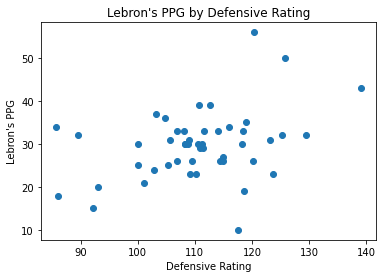

In [171]:
x = final[["DEFRTG"]]
y = final.PTS
plt.title("Lebron's PPG by Defensive Rating")
plt.xlabel("Defensive Rating")
plt.ylabel("Lebron's PPG")
plt.scatter(x,y);

In [172]:
linear = linear_model.LinearRegression()
logit = linear_model.LogisticRegression()

In [173]:
linear.fit(x,y)

LinearRegression()

In [174]:
linear.score(x,y)

0.1314182854028979

In [175]:
logit.fit(x,y)

/Users/pratikbanala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
logit.score(x,y)

0.20833333333333334

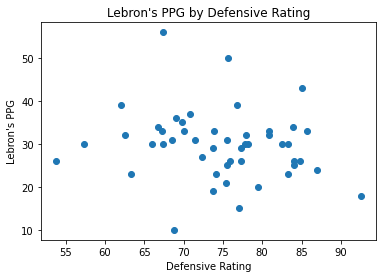

In [185]:
x = final[["DREB%"]]
plt.title("Lebron's PPG by Defensive Rating")
plt.xlabel("Defensive Rating")
plt.ylabel("Lebron's PPG")
plt.scatter(x,y);

In [178]:
linear = linear_model.LinearRegression()
logit = linear_model.LogisticRegression()

In [180]:
linear.fit(x,y)

LinearRegression()

In [181]:
linear.score(x,y)

0.026313229075582534

In [182]:
logit.fit(x,y)

/Users/pratikbanala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [183]:
logit.score(x,y)

0.10416666666666667

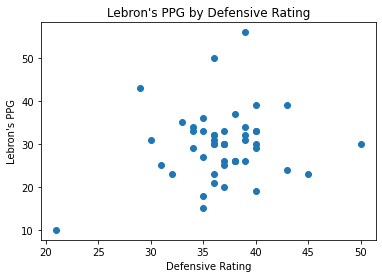

In [186]:
x = final[["MINUTES PLAYED"]]
plt.title("Lebron's PPG by Defensive Rating")
plt.xlabel("Defensive Rating")
plt.ylabel("Lebron's PPG")
plt.scatter(x,y);

In [187]:
linear = linear_model.LinearRegression()
logit = linear_model.LogisticRegression()

In [188]:
linear.fit(x,y)

LinearRegression()

In [189]:
linear.score(x,y)

0.031968573416112145

In [190]:
logit.fit(x,y)

/Users/pratikbanala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
logit.score(x,y)

0.1875

In [192]:
X = final[["DEFRTG","DREB%","MINUTES PLAYED"]]

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

ValueError: x and y must be the same size

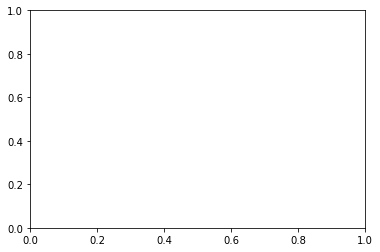

In [194]:
plt.scatter(X_train,y_train);

In [ ]:
driver.close()